In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


In [2]:
deliveries_df = pd.read_csv('/kaggle/input/ipl/deliveries.csv')
matches_df = pd.read_csv('/kaggle/input/ipl/matches.csv')

In [6]:
deliveries_df.head().T

,0,1,2,3,4
match_id,1,1,1,1,1
inning,1,1,1,1,1
batting_team,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
bowling_team,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore
over,1,1,1,1,1
ball,1,2,3,4,5
batsman,DA Warner,DA Warner,DA Warner,DA Warner,DA Warner
non_striker,S Dhawan,S Dhawan,S Dhawan,S Dhawan,S Dhawan
bowler,TS Mills,TS Mills,TS Mills,TS Mills,TS Mills
is_super_over,0,0,0,0,0


In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
comb = matches_df.merge(deliveries_df, left_on='id', right_on='match_id')

In [7]:
comb.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 321
win_by_runs              0
win_by_wickets           0
player_of_match        321
venue                    0
umpire1                248
umpire2                248
umpire3             150460
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
d

In [8]:
comb.shape[0]

150460

In [9]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                150460 non-null  int64  
 1   season            150460 non-null  int64  
 2   city              148760 non-null  object 
 3   date              150460 non-null  object 
 4   team1             150460 non-null  object 
 5   team2             150460 non-null  object 
 6   toss_winner       150460 non-null  object 
 7   toss_decision     150460 non-null  object 
 8   result            150460 non-null  object 
 9   dl_applied        150460 non-null  int64  
 10  winner            150139 non-null  object 
 11  win_by_runs       150460 non-null  int64  
 12  win_by_wickets    150460 non-null  int64  
 13  player_of_match   150139 non-null  object 
 14  venue             150460 non-null  object 
 15  umpire1           150212 non-null  object 
 16  umpire2           15

In [10]:
comb.drop(columns=['umpire3','player_dismissed','dismissal_kind','fielder'], inplace=True)

In [11]:
comb['ratio_runs_wickets'] = comb['win_by_runs']/comb['win_by_wickets']

<Axes: xlabel='Toss Wins', ylabel='toss_winner'>

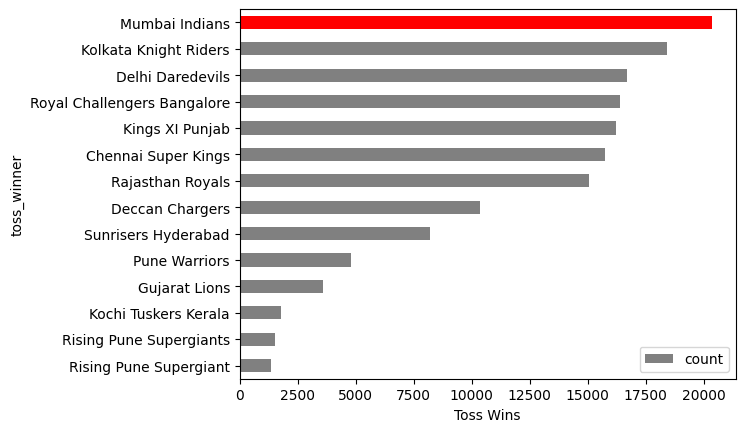

In [51]:
comb.groupby('toss_winner').size().reset_index(name='count').sort_values('count').plot(kind='barh',xlabel='Toss Wins',y='count',x='toss_winner',color=['grey']*13+['red'])

In [22]:
#Player with the most player of the match awards
comb.groupby('player_of_match').size().idxmax()

'CH Gayle'

In [23]:
#Most occurring Umpire 1
comb.groupby('umpire1').size().idxmax()

'HDPK Dharmasena'

In [24]:
#Most occurring  Umpire 2
comb.groupby('umpire2').size().idxmax()

'SJA Taufel'

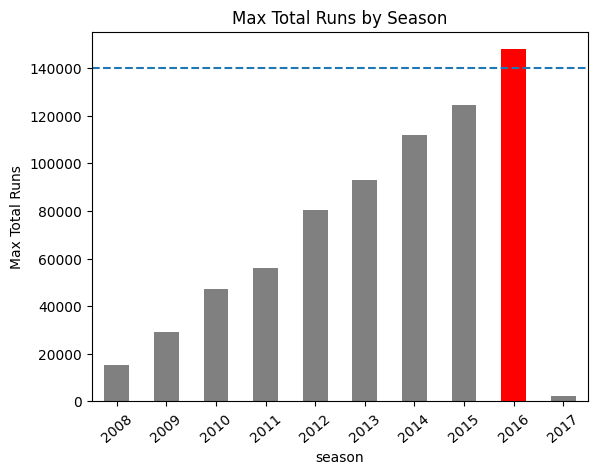

In [49]:
comb.groupby('season')['total_runs'].idxmax().plot(kind='bar',ylabel='Max Total Runs',title='Max Total Runs by Season', rot=40, color=['grey']*8+['red']+['grey'])
plt.axhline(140000, linestyle='dashed')

<Axes: title={'center': 'Total Runs by Season (2016 doesnt have the most total runs)'}, xlabel='season', ylabel='Total Runs'>

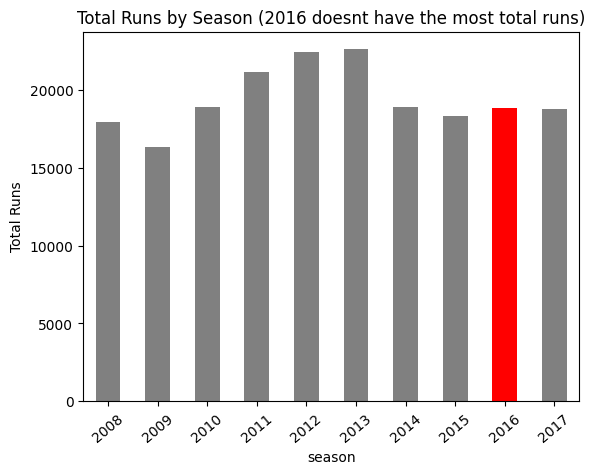

In [47]:
comb.groupby('season')['total_runs'].sum().plot(kind='bar',ylabel='Total Runs',title='Total Runs by Season (2016 doesnt have the most total runs)', rot=40, color=['grey']*8+['red']+['grey'])


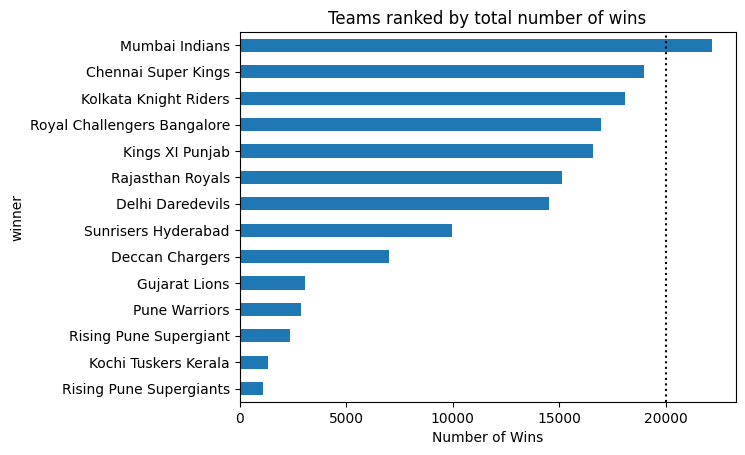

In [46]:
comb.groupby('winner').size().sort_values().plot(kind='barh', title='Teams ranked by total number of wins', xlabel='Number of Wins')
plt.axvline(20000, color='black',linestyle=':')